In [54]:
#Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [55]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [56]:
from sklearn import metrics
import statsmodels.api as sm
import plotly.express as px #for plotting the scatter plot
import seaborn as sns #For plotting the dataset in seaborn
sns.set(style='whitegrid')
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [57]:
#uploading the data set

df = pd.read_csv("Diamond.csv")

In [58]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Data Description

Content and meaning of each column in the data is as below:

price - diamond price in US dollars and target variable (continuous);
carat - weight of the diamond (continuous);
cut - quality of cut (categorical);
color - diamond color (categorical);
clarity - measure of flawless or how clear the diamond is (categorical);
depth - total depth percentage estimated by formulas 
 or 
 (continuous);
table - width of top of the diamond relative to widest point (continuous);
x - lenghth in mm (continuous);
y - width in mm (continuous);
z - depth in mm (continuous).


# Exploratory Data Analysis

In [59]:
#checking first five rows of the data set

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [60]:
#checking last 5 rows of the data set

df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [61]:
#checking the shape

df.shape

(53940, 10)

There are total 53,940 rows and 10 columns in the data set

In [62]:
#checking information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [63]:
#getting data's description

df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [64]:
#all the columns present in the data set

df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [65]:
#all data types

df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [66]:
#Checking for duplicates

df.loc[df.duplicated(keep='first')]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


We can see 146 duplicate rows

In [67]:
#Removing duplicate rows

df = df.drop_duplicates()

In [68]:
df.shape

(53794, 10)

We can se we have dropped 143 rows

In [69]:
#checking of missing values

df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

We can see we don't have any missing value in our data set

In [70]:
#dividing data into categorical and numerical
X_num = df.select_dtypes(include = np.number)
X_cat = df.select_dtypes(exclude = np.number)

In [71]:
#checking counts of the values
X_cat.value_counts

<bound method DataFrame.value_counts of              cut color clarity
0          Ideal     E     SI2
1        Premium     E     SI1
2           Good     E     VS1
3        Premium     I     VS2
4           Good     J     SI2
...          ...   ...     ...
53935      Ideal     D     SI1
53936       Good     D     SI1
53937  Very Good     D     SI1
53938    Premium     H     SI2
53939      Ideal     D     SI2

[53794 rows x 3 columns]>

# Outliars

In [72]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

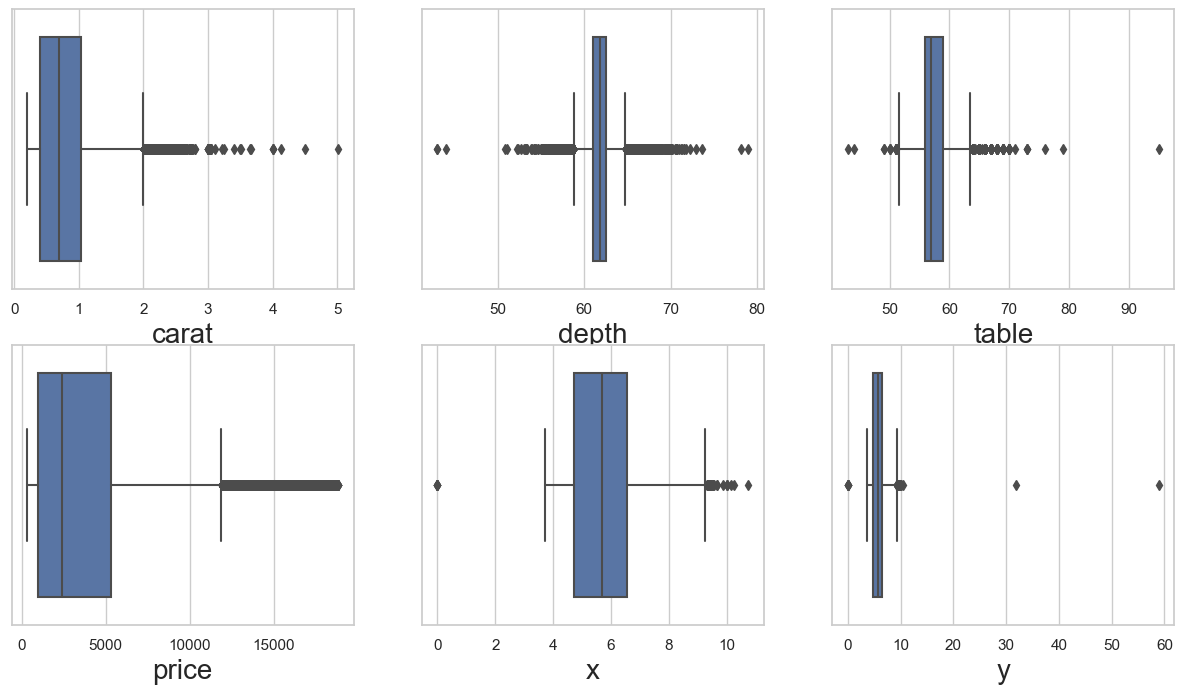

In [73]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

We can see alot of outliars in multiple columns

In [74]:
df.mean()

carat       0.797780
depth      61.748080
table      57.458109
price    3933.065082
x           5.731214
y           5.734653
z           3.538714
dtype: float64

In [75]:
df.median()

carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

We can see price column has outliars.

In [76]:
#Removing outliars

#removing outliers with IQR 
q1 = np.quantile(df.price, 0.25) #1st quantile
q2 = np.quantile(df.price, 0.5) #2nd quantile
q3 = np.quantile(df.price, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [77]:
#setting the fences on our dataset to identify the outliers
lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [78]:
#removal of lower and upper outliers in our data
df = df[~((df.price > upper) | (df.price < lower))]


In [79]:
df.shape

(50271, 10)

We now have 50271 rows and 10 columns

# Missing values

In [80]:
#to see if any columns has empty cells
for column in df:
    print(" Number of empty cells in {} is {} ". format(column, (df[column]=="").sum()))

 Number of empty cells in carat is 0 
 Number of empty cells in cut is 0 
 Number of empty cells in color is 0 
 Number of empty cells in clarity is 0 
 Number of empty cells in depth is 0 
 Number of empty cells in table is 0 
 Number of empty cells in price is 0 
 Number of empty cells in x is 0 
 Number of empty cells in y is 0 
 Number of empty cells in z is 0 


In [81]:
#finding the number of zeros in each column
for column in df:
    print(("Number of zeros in {} is {}".format(column,(df[column]==0).sum())))

Number of zeros in carat is 0
Number of zeros in cut is 0
Number of zeros in color is 0
Number of zeros in clarity is 0
Number of zeros in depth is 0
Number of zeros in table is 0
Number of zeros in price is 0
Number of zeros in x is 4
Number of zeros in y is 3
Number of zeros in z is 11


From the above table also we see that x (length), y(breadth) and z(depth) have zero as these minimum value. So we need to remove these entries with 0s using the code below.There are no empty cells.

In [82]:
#dropping all zero values from x,y and z columns
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [83]:
#to check the minimum values of x,y and z
df.describe()

,carat,depth,table,price,x,y,z
count,50260.000000,50260.000000,50260.000000,50260.000000,50260.000000,50260.000000,50260.000000
mean,0.723668,61.754640,57.422531,3161.074055,5.583745,5.586968,3.449377
std,0.383513,1.427651,2.228079,2765.779340,0.992945,0.992362,0.628034
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,61.100000,56.000000,911.000000,4.670000,4.680000,2.880000
50%,0.700000,61.800000,57.000000,2157.500000,5.590000,5.580000,3.430000
75%,1.010000,62.500000,59.000000,4670.000000,6.430000,6.420000,3.980000
max,3.650000,79.000000,79.000000,11888.000000,9.540000,31.800000,31.800000


As we know, in our dataset, the columns cut, clarity and colour have non numerical entries. These features or predictors are called as categorical variables as they put the variable entries in various categories. Like in our example, predictor cut has various categories like Ideal, Premium and Good. To deal with categorical entries, techniques like one hot encoding, dummy coding, label encoding etc can be used. In this implementation, built in methods are not used. Instead, the categories in the categorical variables are replaced by the numeric value as per the category significance. This is shown in the code below-



# Multicollinearity

Checking for multicollinearity among the independent variables and also identifying non contributing independent variable
Before we proceed ahead with the regression, it is very important to check for existence of multicollinearity among the independent variable. That ascertaining whether the change in one variable brings about the change in another independent variable also. If that is the case, we should remove one of the variables from the predictor variable list to make the model more accurate. Moreover, we also need to check if all the independent variables in consideration are actually contributing to the change in dependent variable. Removing any such non-contributing independent variable can aid in reducing the Mean Square Error (MSE).


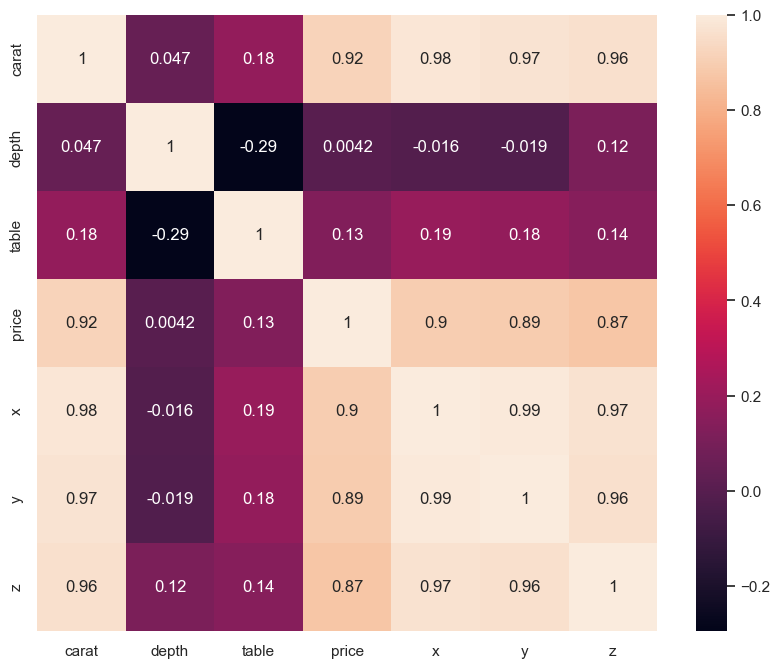

In [84]:
# Create a correlation matrix between every pair of attributes
corr_matrix = x.corr()

# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()


Now, we know that variable, x, y and z are length, height and depth respective. Product of these variables can give one single variable “volume”. We can use the following code to implement the same.

In [85]:
#Reducing three variables x, y, z to a single variable
df['volume']= df['x']*df['y']*df["z"] 
#now we can drop x,y,z columns
df=df.drop(['x','y','z'], axis=1)
#Visualizing the data frame to see the change
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


<Axes: >

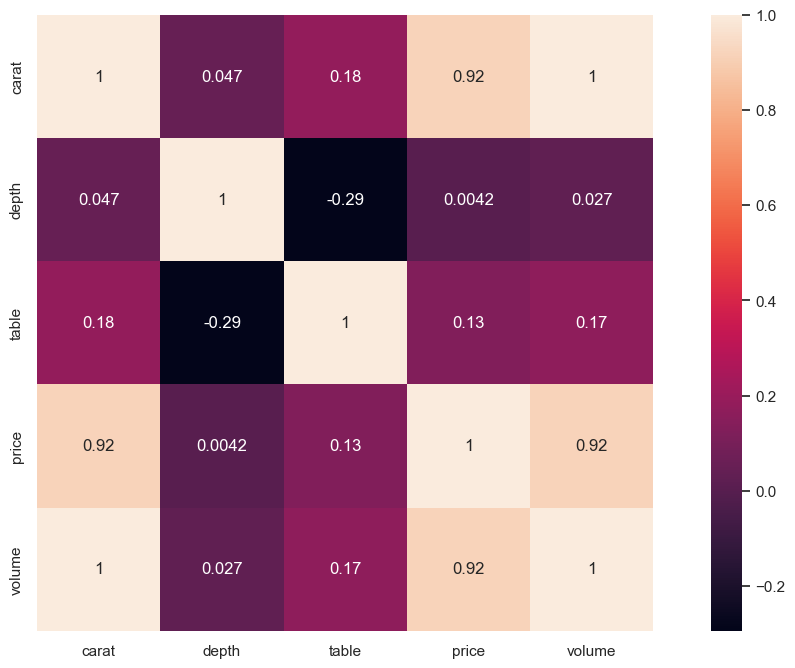

In [86]:
#Plot heat map to see the correlation among the variables
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

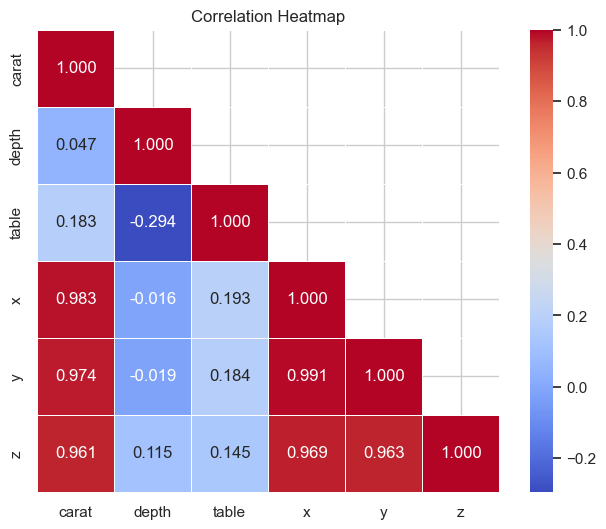

In [87]:
# plotting heatmap
def plot_heatmap():
    from seaborn import heatmap
    
    # define correlation matrix
    corr_df = x.corr(method='pearson')
    df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))
    
    # plot heatmap
    plt.figure(figsize=(8, 6))
    heatmap(data=df_lt, annot=True, square=True, cbar=True, linewidths=.5, fmt='.3f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_heatmap()


In [88]:
def calculate_vif(df):
    # Select only the numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculate VIF values
    vif = np.zeros(numeric_df.shape[1])
    for i in range(numeric_df.shape[1]):
        # extracting the label in loop
        y = numeric_df.iloc[:, i]
        # extracting the all features which is not label
        x = numeric_df.iloc[:, np.arange(numeric_df.shape[1]) != i]
        # fit the  model
        model = LinearRegression().fit(x, y)
        # claculate the R_2
        r_squared = model.score(x, y)
        # calculating VIF
        vif[i] = 1 / (1 - r_squared)

    # Create a DataFrame to store the VIF values
    vif_df = pd.DataFrame({
        "features": numeric_df.columns,
        "VIF": vif
    })

    return vif_df

In [89]:
calculate_vif(df)

,features,VIF
0,carat,133.931629
1,depth,1.207389
2,table,1.212485
3,price,6.397039
4,volume,129.897838


Since volue has very high VIF, we are dropping it.

In [90]:
df=df.drop(['volume'], axis=1)
df.head() #Visualize the dataframe

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


As we know, in our dataset, the columns cut, clarity and colour have non numerical entries. These features or predictors are called as categorical variables as they put the variable entries in various categories. Like in our example, predictor cut has various categories like Ideal, Premium and Good. To deal with categorical entries, techniques like one hot encoding, dummy coding, label encoding etc can be used. In this implementation, built in methods are not used. Instead, the categories in the categorical variables are replaced by the numeric value as per the category significance. This is shown in the code below-

In [91]:
#Replacing the categorical value colour, cut and clarity without using built in function for categorical data
df=df.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
df=df.replace({'cut': {'Ideal':4, 'Premium': 3, 'Very Good':2, 'Good':1, 'Fair':0}})
df=df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1, 'I2':0, 'I3':0}})
#Visualize the data frame
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,2,61.5,55.0,326
1,0.21,3,5,3,59.8,61.0,326
2,0.23,1,5,5,56.9,65.0,327
3,0.29,3,1,4,62.4,58.0,334
4,0.31,1,0,2,63.3,58.0,335


In [92]:
#Built-in function to standardize the data
from sklearn.preprocessing import StandardScaler
cols=['carat', 'depth','table'] #identifying the columns to be standardized
for i in cols:
#fit the training data with standard scale
    scale = StandardScaler().fit(df[[i]])
# standardize the numerical predictor columns in the dataframe
    df[i] = scale.transform(df[[i]])

In [93]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,-1.287238,4,5,2,-0.178365,-1.087284,326
1,-1.339388,3,5,3,-1.369144,1.605646,326
2,-1.287238,1,5,5,-3.400474,3.400932,327
3,-1.130788,3,1,4,0.452048,0.259181,334
4,-1.078638,1,0,2,1.082461,0.259181,335


# Linear Regression

In [95]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [96]:
x.shape

(50260, 6)

In [97]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [98]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

LinearRegression()

In [99]:
#Predict the value of y based on the test data
y_prediction =  model.predict(x_test)

In [100]:
#Obtain the intercept and the coefficient and model equation
b0= model.intercept_
b1= model.coef_
print(" Equation of the regression line is \n y_est= {} + {}x1 + {}x2 + {}x3 + {}x4 + {}x5 + {}x6".format(b0,b1[0], b1[1], b1[2], b1[3], b1[4], b1[5]))

 Equation of the regression line is 
 y_est= 466.2088139823554 + 2903.6065150644067x1 + 95.55528030766925x2 + 232.78677224960543x3 + 394.7999162800843x4 + -47.51364323560438x5 + -36.996454023980434x6


In [101]:
#Obtain the r_squared value
print("r_squared value is ", model.score(x,y))

r_squared value is  0.9010172150735783


In [102]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test)

# Calculate the mean squared error (MSE)
MSE = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)

print("Mean Square Error is", MSE)
print("Root Mean Square Error is", RMSE)


Mean Square Error is 740170.8154094191
Root Mean Square Error is 860.3318054154566


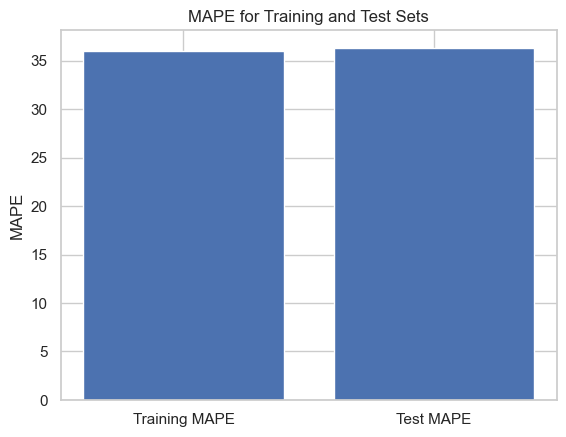

In [103]:
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate MAPE for training set
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate MAPE for test set
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Plot MAPE
labels = ['Training MAPE', 'Test MAPE']
values = [train_mape, test_mape]

plt.bar(labels, values)
plt.ylabel('MAPE')
plt.title('MAPE for Training and Test Sets')
plt.show()


In [48]:
train_mape , test_mape

(35.52575085602639, 35.64222445417249)

MAPE for LR is 35.64222445417249

# KNN

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
# Create a KNN regressor and fit the training data
k = 3 # number of nearest neighbors to consider
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = knn.predict(x_test)

# Evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 357812.21042799664


In [106]:
y_pred = knn.predict(x_test)

# Evaluate the model performance using mean absolute percentage error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)

MAPE: 14.521807012553523


MAPE for KNN is 14.521807012553523

# Decision tree

In [237]:
from sklearn.tree import DecisionTreeRegressor

In [239]:


# Create a decision tree regressor model and fit the training data
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

# Predict the target variable for the test data
y_pred = dt.predict(x_test)

# Evaluate the model performance using mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 259220.59196233665
R-squared Score: 0.9663557789806845


In [243]:
mape = mean_absolute_percentage_error(y_test, y_pred)

In [244]:
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 10.100755054755005


In [248]:
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 148548.4588258305
R-squared Score: 0.9802825059025719


MAPE for Decision Tree is 10.100755054755005

# random forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your feature matrix X and target vector y

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a random forest regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(x_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 148759.51480054262


In [110]:
mape = mean_absolute_percentage_error(y_test, y_pred)


print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 8.293886377612154


MAPE for random forest is 8.293886377612154


MAPE for LR is 35.64222445417249

MAPE for KNN is 14.521807012553523

MAPE for Decision Tree is 10.100755054755005

MAPE for random forest is 8.293886377612154

We see that Random forest gives us the least MAPE.